In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import os
from imutils import paths

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
train_data = []
train_labels = []
 
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/Netology/CNN/hymenoptera_data/train')))

for imagePath in imagePaths:
    # загружаем изображение и добавляем в список
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
    # приводим картинки к одинаковому размеру
    image = cv2.resize(image, (128, 128)).flatten()
    train_data.append(image)
 
    # извлекаем метку класса из пути к изображению и обновляем список меток
    train_label = imagePath.split(os.path.sep)[-2]
    train_labels.append(train_label) 

len(train_labels), len(imagePaths), train_labels[120:126]

(244, 244, ['ants', 'ants', 'ants', 'bees', 'bees', 'bees'])

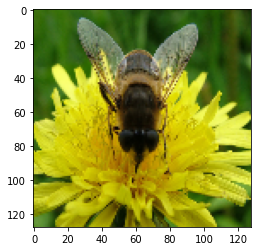

In [ ]:
plt.imshow(image.reshape(128, 128, 3))

In [ ]:
#переводим метки класса в числа
train_labels = np.array(train_labels)
train_labels[train_labels == 'ants'] = 0
train_labels[train_labels == 'bees'] = 1
train_labels = np.array(train_labels, dtype=int)
train_labels[120:126]

array([0, 0, 0, 1, 1, 1])

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1]
train_data = np.array(train_data, dtype="float") / 255
train_data.shape

(244, 49152)

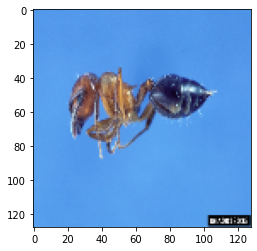

In [ ]:
plt.imshow(train_data[0].reshape(128, 128, 3))

In [ ]:
### получаем тренировочный датасет

In [ ]:
train_dataset = train_data.reshape(train_data.shape[0], 128, 128, 3)
train_dataset.shape

(244, 128, 128, 3)

In [ ]:
# получаем датасет, на котором будем тестировать из папки val

In [ ]:
test_data = []
test_labels = []
 
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/Netology/CNN/hymenoptera_data/val')))

for imagePath in imagePaths:
    # загружаем изображение и добавляем в список
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
    # приводим картинки к одинаковому размеру
    image = cv2.resize(image, (128, 128)).flatten()
    test_data.append(image)
 
    # извлекаем метку класса из пути к изображению и обновляем список меток
    test_label = imagePath.split(os.path.sep)[-2]
    test_labels.append(test_label) 

len(test_data), len(imagePaths), test_labels[67:73]

(153, 153, ['ants', 'ants', 'ants', 'bees', 'bees', 'bees'])

In [ ]:
test_dataset = np.array(test_data, dtype="float") / 255
test_dataset.shape

(153, 49152)

In [ ]:
test_dataset = test_dataset.reshape(test_dataset.shape[0], 128, 128, 3)
test_dataset.shape

(153, 128, 128, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=train_dataset.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 6)       456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [ ]:
#обучение
y_train_labels = tf.keras.utils.to_categorical(train_labels)

model.fit(train_dataset, y_train_labels,
          batch_size=32, 
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 38ms/step - loss: 0.6753 - accuracy: 0.5293 - val_loss: 0.9064 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6614 - accuracy: 0.6430 - val_loss: 0.7217 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6767 - accuracy: 0.6677 - val_loss: 0.7555 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6614 - accuracy: 0.6397 - val_loss: 0.9211 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 17ms/step - loss: 0.6145 - accuracy: 0.6694 - val_loss: 0.7193 - val_accuracy: 0.5306
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6056 - accuracy: 0.6681 - val_loss: 0.9366 - val_accuracy: 0.0612
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.5929 - accuracy: 0.6730 - val_loss: 1.3433 - val_accuracy: 0.0000e+00
Epoch 8

In [ ]:
#переводим метки класса в числа
test_labels = np.array(test_labels)
test_labels[test_labels == 'ants'] = 0
test_labels[test_labels == 'bees'] = 1
test_labels = np.array(test_labels, dtype=int)
test_labels[67:73]

array([0, 0, 0, 1, 1, 1])

In [ ]:
y_test_labels = tf.keras.utils.to_categorical(test_labels)
test_dataset.shape, y_test_labels.shape

((153, 128, 128, 3), (153, 2))

In [ ]:
# Предсказываем класс объекта на датасете из папки val

In [ ]:
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
# Оцениваем качество решения на валидационной выборке

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(test_labels, y_pred_labels))

Accuracy: 0.5294117647058824


In [ ]:
### что то неважная точность. Может быть маленький датасет. Едем дальше

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.49      0.90      0.64        70
           1       0.72      0.22      0.33        83

    accuracy                           0.53       153
   macro avg       0.61      0.56      0.48       153
weighted avg       0.62      0.53      0.47       153



In [ ]:
## Визуализируем предсказания для тестовой выборки

In [ ]:
image.reshape(128, 128, 3).shape

(128, 128, 3)

In [ ]:
y_pred_test = model.predict(image.reshape(1, 128, 128, 3))
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

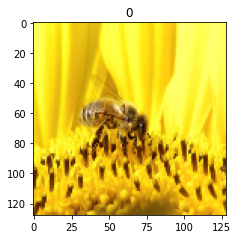

In [ ]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(image.reshape(1, 128, 128, 3))), 5)
img_prediction = zip(image.reshape(1, 128, 128, 3), y_pred_test_labels)
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img)
    subplot.set_title('%d' % pred);

In [ ]:
# добавим batchnorm

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=train_dataset.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#обучение
y_train_labels = tf.keras.utils.to_categorical(train_labels)

model.fit(train_dataset, y_train_labels,
          batch_size=32, 
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 48ms/step - loss: 0.7545 - accuracy: 0.5283 - val_loss: 0.4342 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 23ms/step - loss: 0.5255 - accuracy: 0.7336 - val_loss: 0.8661 - val_accuracy: 0.1224
Epoch 3/10
7/7 [==============================] - 0s 22ms/step - loss: 0.4005 - accuracy: 0.8439 - val_loss: 0.5507 - val_accuracy: 0.7551
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3426 - accuracy: 0.8380 - val_loss: 0.8600 - val_accuracy: 0.3061
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 0.3635 - accuracy: 0.8439 - val_loss: 0.4755 - val_accuracy: 0.8571
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 0.2041 - accuracy: 0.9335 - val_loss: 0.5923 - val_accuracy: 0.7143
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 0.2036 - accuracy: 0.9315 - val_loss: 1.3068 - val_accuracy: 0.1429
Epoch 8/10
7/7 [===========

In [ ]:
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
print('Accuracy: %s' % accuracy_score(test_labels, y_pred_labels))

Accuracy: 0.5947712418300654


In [ ]:
#resNet 50 c рандомными весами

In [ ]:
train_dataset.shape

(244, 128, 128, 3)

In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=True, weights=None, input_tensor=None,
    input_shape=(128, 128, 3), pooling=None, classes=2
)

In [ ]:
model.compile('rmsprop', loss='categorical_crossentropy')

In [ ]:
model.fit(train_dataset, y_train_labels,
          batch_size=32, 
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 10s 261ms/step - loss: 5.3104 - val_loss: 0.2869
Epoch 2/10
7/7 [==============================] - 1s 127ms/step - loss: 2.3515 - val_loss: 0.3140
Epoch 3/10
7/7 [==============================] - 1s 126ms/step - loss: 1.2118 - val_loss: 0.0064
Epoch 4/10
7/7 [==============================] - 1s 126ms/step - loss: 1.1739 - val_loss: 3.1448
Epoch 5/10
7/7 [==============================] - 1s 126ms/step - loss: 1.0950 - val_loss: 4.2230
Epoch 6/10
7/7 [==============================] - 1s 126ms/step - loss: 1.0950 - val_loss: 2.7742
Epoch 7/10
7/7 [==============================] - 1s 128ms/step - loss: 1.1195 - val_loss: 2.3534
Epoch 8/10
7/7 [==============================] - 1s 127ms/step - loss: 0.7267 - val_loss: 2.0789
Epoch 9/10
7/7 [==============================] - 1s 126ms/step - loss: 1.6266 - val_loss: 84.1919
Epoch 10/10
7/7 [==============================] - 1s 127ms/step - loss: 0.9811 - val_loss: 18.9025


In [ ]:
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
print('Accuracy: %s' % accuracy_score(test_labels, y_pred_labels))

Accuracy: 0.5098039215686274


In [ ]:
#resNet 50 c весами imagenet

In [ ]:
from tensorflow.keras.applications import vgg19

In [ ]:
#загружаем предобученную сеть

In [ ]:
яfeature_extractor = vgg19.VGG19(weights='imagenet',
                                input_shape=train_dataset.shape[1:],
                                include_top=False)

feature_extractor.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(128, 128, 3), pooling=None, classes=2
)

In [ ]:
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
test_labels.shape, y_pred_labels.shape

((153,), (153, 4, 2048))

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred_labels[:1][0], len(y_pred_labels[:1][0][0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 3, 0, 0]]), 2048)

In [ ]:
accuracy_score(test_labels, y_pred_labels, normalize=False)

ValueError: ignored